### References:
http://www.fileformat.info/format/tiff/egff.htm

In [2]:
import struct
import numpy as np
import gdal
from PIL import Image

### Read the raw data from the file into a string
Get the data from here: https://engineering.purdue.edu/~biehl/MultiSpec/hyperspectral.html

In [3]:
filename = 'dc.tif'
fp = open(filename, 'rb')

### Use gdal to open the file

In [4]:
ds = gdal.Open(filename)

In [10]:
# https://en.wikipedia.org/wiki/Color
# red = 700 nm
# green = 530 nm
# blue = 470 nm

redBand = 54
greenBand = 31
blueBand = 19

redArray = np.array(ds.GetRasterBand(redBand).ReadAsArray())
redArray = (redArray.astype(np.float) / np.max(redArray) * 255).astype(np.uint8)

greenArray = np.array(ds.GetRasterBand(greenBand).ReadAsArray())
greenArray = (greenArray.astype(np.float) / np.max(greenArray) * 255).astype(np.uint8)

blueArray = np.array(ds.GetRasterBand(blueBand).ReadAsArray())
blueArray = (blueArray.astype(np.float) / np.max(blueArray) * 255).astype(np.uint8)

(1280, 307, 3)


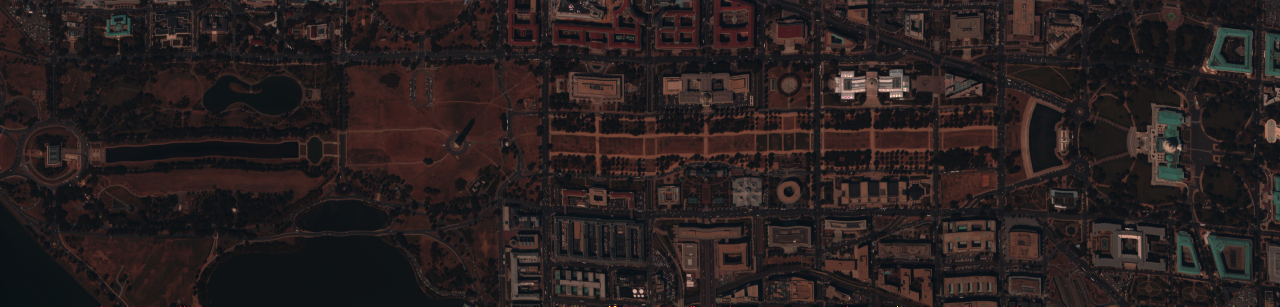

In [11]:
rgbArray = np.empty([redArray.shape[0], redArray.shape[1], 3], dtype=redArray.dtype)
rgbArray[..., 0] = redArray
rgbArray[..., 1] = greenArray
rgbArray[..., 2] = blueArray

print rgbArray.shape

Image.fromarray(rgbArray, 'RGB').rotate(90)

# Start of my own TIFF library because I don't have GDAL everywhere

### Get the Image File Directory Offset

In [ ]:
fp.seek(0)
endian = '<' if fp.read(2) == 'II' else '>'
fp.seek(4)
ifdOffset = struct.unpack('%si' % endian, fp.read(4))[0]
ifdOffset

### Go to the ifOffset and read in the image file header

In [ ]:
dataTypeDict = {3: 'H', # 16-bit unsigned short
                4: 'L', # 32-bit unsigned integer
                5: '2L'} # rational (fraction) = 2 32-bit uints = nom / denom
tagIDDict = {254: 'NewSubfileType',
             256: 'ImageWidth',
             257: 'ImageLength',
             258: 'BitsPerSample',
             259: 'Compression',
             262: 'PhotometricInterpretation',
             273: 'StripOffsets',
             277: 'SamplesPerPixel',
             278: 'RowsPerStrip',
             279: 'StripByteCounts',
             282: 'XResolution',
             283: 'YResolution',
             284: 'PlanarConfiguration',
             296: 'ResolutionUnit',
             339: 'SampleFormat'}

In [ ]:
fp.seek(ifdOffset)
numDirEntries = struct.unpack('%sh' % endian, fp.read(2))[0]
print 'numDirEntries', numDirEntries
for _ in range(numDirEntries):
    # tagID, dataType, dataCount, dataOffset
    print struct.unpack('%shhii' % endian, fp.read(12))